In [ ]:
# Following circuit is made of 2-bit comparator named "cicuit 9" which recives two inputes 
# e.g (01,00) and then (11,10). circit 9 compares and swap two number of two bit at a time and we used 
# two circuit 9 to acumodate a string of four numbers. 

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
qr1 = QuantumRegister(4)
circuit = QuantumCircuit(qr1)

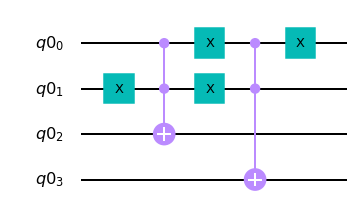

In [3]:
#  Uc 
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[2])
circuit.x(qr1[0])
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[3])
circuit.x(qr1[0])
circuit.draw(output='mpl')

In [4]:
# Making UC circuit a gate
UC = circuit.to_gate()
type(UC)

qiskit.circuit.gate.Gate

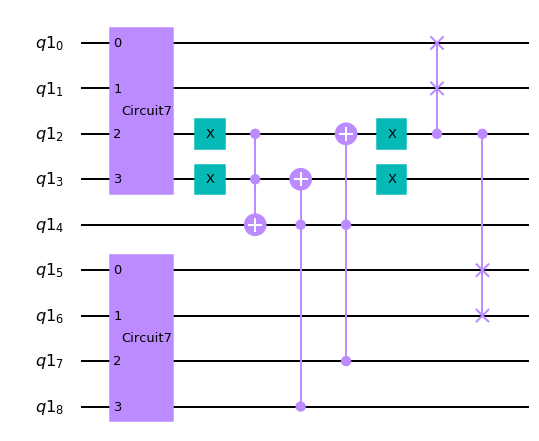

In [5]:
com = QuantumRegister(9)
circuit1 = QuantumCircuit(com)


circuit1.append(UC,[0,1,2,3])
circuit1.append(UC,[5,6,7,8])

circuit1.x(com[2])
circuit1.x(com[3])
circuit1.ccx(com[2],com[3],com[4])
circuit1.ccx(com[8],com[4],com[3])
circuit1.ccx(com[7],com[4],com[2])
circuit1.x(com[2])
circuit1.x(com[3])


circuit1.cswap(com[2], com[0], com[1])
circuit1.cswap(com[2], com[5], com[6])


#circuit1.cswap(com[3], com[0], com[1])
#circuit1.cswap(com[3], com[5], com[6])

# Measuring Significant output
#circuit1.measure(com[2],mea[0])
#circuit1.measure(com[3],mea[1])
circuit1.draw(output='mpl')




In [6]:
Excswapgate2bit = circuit1.to_gate()
type(Excswapgate2bit)

qiskit.circuit.gate.Gate

In [7]:
coms = QuantumRegister(9)


firstnum = ClassicalRegister(2)
secondnum = ClassicalRegister(2)
thirdnum  = ClassicalRegister(2)
fourthnum  = ClassicalRegister(2)

circuit2 = QuantumCircuit(coms,firstnum,secondnum,thirdnum,fourthnum)

initial=[[1,0],[0,1]]

circuit2.initialize(initial[0], 0)
circuit2.initialize(initial[1], 5)


circuit2.initialize(initial[0], 1)
circuit2.initialize(initial[0], 6)



circuit2.reset(coms[2])
circuit2.reset(coms[3])
circuit2.reset(coms[4])
circuit2.reset(coms[7])
circuit2.reset(coms[8])


circuit2.append(Excswapgate2bit,[0,1,2,3,4,5,6,7,8])

circuit2.measure(coms[0],  firstnum[0])
circuit2.measure(coms[5],  firstnum[1])

circuit2.measure(coms[1], secondnum[0])
circuit2.measure(coms[6], secondnum[1])


In [8]:




simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit2, backend = simulator, shots = 1).result()
counts = result.get_counts()

print(counts)
#circuit2.draw(output='mpl')

{'00 00 10 00': 1}


In [9]:

circuit2.barrier()

circuit2.initialize(initial[1], 0)
circuit2.initialize(initial[1], 5)


circuit2.initialize(initial[1], 1)
circuit2.initialize(initial[0], 6)



circuit2.reset(coms[2])
circuit2.reset(coms[3])
circuit2.reset(coms[4])
circuit2.reset(coms[7])
circuit2.reset(coms[8])


circuit2.append(Excswapgate2bit,[0,1,2,3,4,5,6,7,8])






circuit2.measure(coms[0],  thirdnum[0])
circuit2.measure(coms[5],  thirdnum[1])

circuit2.measure(coms[1], fourthnum[0])
circuit2.measure(coms[6], fourthnum[1])

simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit2, backend = simulator, shots = 1).result()
counts = result.get_counts()

(counts)


{'11 01 10 00': 1}

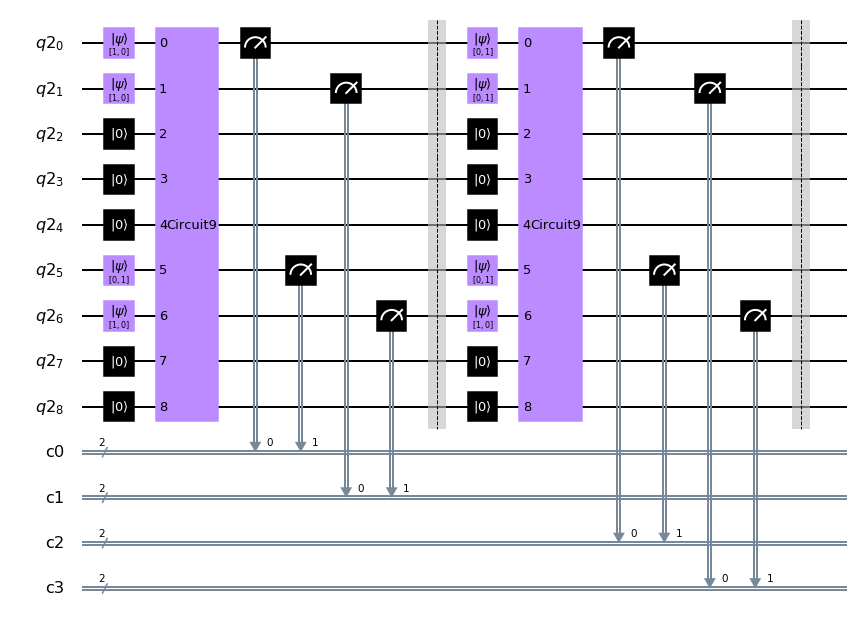

In [10]:
circuit2.barrier()
circuit2.draw(output='mpl')